# Heart Disease Prediction with Python
#### Author: <a href="https://tonmoy-talukder.netlify.app/">Tonmoy Talukder</a>
CS Undergrad, <a href="https://www.aust.edu/"> AUST</a>, Dhaka 1208, Bangladesh

## Dataset Reference: 
<a href="https://www.kaggle.com/ronitf/heart-disease-uci">Browse The Dataset</a>

### Import required libraries

In [956]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# from sklearn.datasets import load_iris as load_df
from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings #to igonre the warnings
warnings.filterwarnings('ignore')


# check for the sklearn version
import sklearn
print("sklearn version: ",sklearn.__version__)

sklearn version:  0.24.1


### Loading Dataset
**Dataset Source:** <a href="https://www.kaggle.com/ronitf/heart-disease-uci">Browse Here</a>

In [957]:
df = pd.read_csv("heart.csv")
display(df.head(10))
#print(df.to_string())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [958]:
print(df.shape)

(303, 14)


> **The dataset has 14 rows ans 303 columns**

### Dataset Information 

In [959]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


> **Columns Understanding:**
> - **Age:** Patient's age in years
> - **Sex:** 1 = male & 0 = female
> - **CP :** chest pain type
> - **Trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
> - **Chol:** serum cholestoral in mg/dl
> - **fbs:** (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
> - **restecg:** resting electrocardiographic results
> - **thalach:** maximum heart rate achieved
> - **exang:** exercise induced angina (1 = yes; 0 = no)
> - **oldpeak:** ST depression induced by exercise relative to rest
> - **slope:** the slope of the peak exercise ST segment
> - **ca:** number of major vessels (0-3) colored by flourosopy
> - **thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect
> - **target:** 0 not have disease , 1 have disease 

> *These are the **fourteen features** of this dataset.*

### Checking missing value 

In [960]:
#check missing value 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [961]:
assert df.isnull().sum().sum() == 0

> **There are no missing value in this dataset.**

In [962]:
# Renamimng the columns' names which are a little bit hard to understand
df = df.rename(columns={'age':'Age', 
                        'sex':'Sex',
                        'cp': 'Chest_Pain',
                        'trestbps': 'Resting_Blood_Pressure',
                        'chol': 'Cholestoral',
                        'fbs': 'Fasting_Blood_Sugar',
                        'restecg': 'Rest_ECG',
                        'thalach': 'Max_Heart_Rate',
                        'exang': 'Exercise_Induced_Aangina',
                        'oldpeak': 'Oldpeak',
                        'slope': 'Slope',
                        'ca': 'CA',
                        'thal': 'Defectivity',
                        'target': 'Have_disease?'})

display(df.head())

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholestoral,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exercise_Induced_Aangina,Oldpeak,Slope,CA,Defectivity,Have_disease?
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [963]:
# Remove Solpe, CA, Defectivity and Have disease? columns as they are seems to excessive.
df.drop(['Slope', 'CA', 'Defectivity'], axis=1, inplace=True)
display(df.head())

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholestoral,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exercise_Induced_Aangina,Oldpeak,Have_disease?
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1


### One-hot Encoding

In [964]:
df = pd.get_dummies(df, drop_first=True)

### Data Preprocessing

In [965]:
print(df['Sex'].unique())
print(df['Fasting_Blood_Sugar'].unique())
print(df['Exercise_Induced_Aangina'].unique())

[1 0]
[1 0]
[0 1]


In [966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       303 non-null    int64  
 1   Sex                       303 non-null    int64  
 2   Chest_Pain                303 non-null    int64  
 3   Resting_Blood_Pressure    303 non-null    int64  
 4   Cholestoral               303 non-null    int64  
 5   Fasting_Blood_Sugar       303 non-null    int64  
 6   Rest_ECG                  303 non-null    int64  
 7   Max_Heart_Rate            303 non-null    int64  
 8   Exercise_Induced_Aangina  303 non-null    int64  
 9   Oldpeak                   303 non-null    float64
 10  Have_disease?             303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


> **All columns of the dataset are nymeric**

#### Target variable

In [967]:
df['Sex'].value_counts()

1    207
0     96
Name: Sex, dtype: int64

> **Male: 207 and Female: 96**

#### Feature and target variable separation

In [968]:
X = df.drop('Sex', axis=1)
y = df[['Sex']]

print("Features:" ,X.shape)
print("Targets:" ,y.shape)

Features: (303, 10)
Targets: (303, 1)


### Train test separation

In [969]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(212, 10) (91, 10) (212, 1) (91, 1)


### Stratification

In [970]:
class_0_train = y_train['Sex'].value_counts().values[0]
class_1_train = y_train['Sex'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print("Training Ratio: ",train_ratio)

Training Ratio:  0.46206896551724136


In [971]:
class_0_test = y_test['Sex'].value_counts().values[0]
class_1_test = y_test['Sex'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print("Test Ratio: ",test_ratio)

Test Ratio:  0.46774193548387094


### Training: Decision Tree Classifier

In [972]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

#### Prediction

In [973]:
y_pred = model.predict(X_test)

#### Prediction Comparison with the test data

In [974]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Sex'] = y_pred

display(y_test.sample(10))

,Sex,probability,predicted_Sex
156,1,1.0,1
117,1,0.0,0
292,0,1.0,1
171,1,1.0,1
247,1,1.0,1
262,1,1.0,1
66,1,1.0,1
120,0,1.0,1
20,1,0.0,0
293,1,1.0,1


### Tree diagram of the Decision Tree

In [975]:
# iris = load_iris()

# iris_data = df
# iris_data.head()

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(iris.data, iris.target)

# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True,special_characters=True)  
# graph = graphviz.Source(dot_data)

# graph

> *Visualize decision tree without GraphViz using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html">plot_tree</a> function.*

In [976]:
clf = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

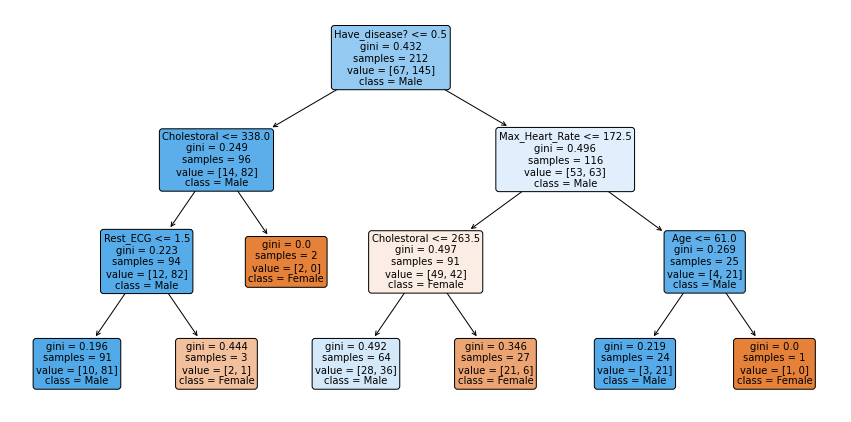

In [977]:
plt.figure(figsize=(15,7.5))
visualize_tree = plot_tree(clf, 
              feature_names= X.columns, 
              class_names= ["Female",  "Male"], 
              filled=True, 
              rounded=True, 
              fontsize=10)

### Confusion Matrix

In [978]:
confusion_matrix_ = confusion_matrix(y_test['Sex'], 
                                     y_test['predicted_Sex'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[14 15]
 [18 44]]


In [979]:
y_test['Sex'].value_counts()

1    62
0    29
Name: Sex, dtype: int64

In [980]:
TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)


FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

True Positives =  44
True Negatives =  14
False Positives =  15
False Negatives =  18


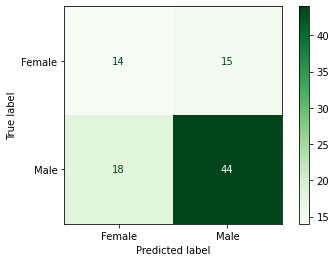

In [981]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['Sex'], 
                      display_labels=["Female", "Male"],
                      cmap='Greens')
plt.show()

In [982]:
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test['Sex'], 
                           y_test['predicted_Sex'])*100

print('Accuracy = ', np.round(accuracy, 2), "%") #Higher Better

Accuracy =  63.74 %


#### Precision

In [983]:
precision_ = np.round(precision_score(y_test['Sex'], 
                               y_test['predicted_Sex']), 2)
recall_ = np.round(recall_score(y_test['Sex'], 
                               y_test['predicted_Sex']), 2)
f1_score__ = np.round(f1_score(y_test['Sex'], 
                               y_test['predicted_Sex']), 2)

print("Precision = ", precision_*10,"out of 10") #Higher Better
print("Recall = ", recall_*10,"out of 10") #Higher Better
print("f1 score = ", f1_score__*10,"out of 10") #Higher Better

Precision =  7.5 out of 10
Recall =  7.1 out of 10
f1 score =  7.3 out of 10


#### True Positive Rate, False Positive Rate

In [984]:
#Threshold = 0.5
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR*100,"%") #Higher Better
print("False Positive Rate = ", FPR*100,"%") # Lower Better

True Positive Rate =  71.0 %
False Positive Rate =  52.0 %


### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

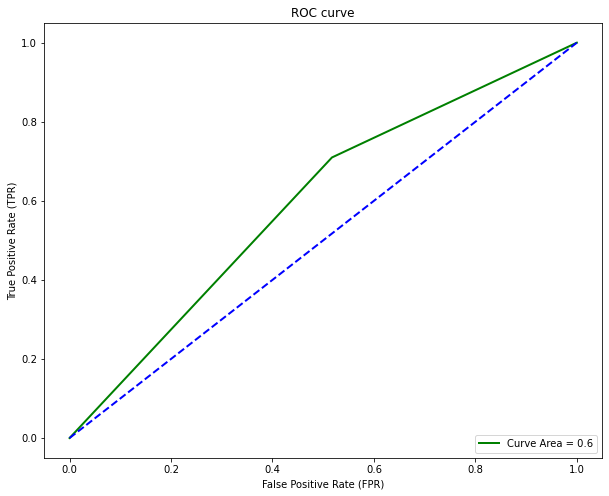

In [985]:
fpr, tpr, thr = roc_curve(y_test['Sex'], 
                          y_test['predicted_Sex'])
auc = np.round(roc_auc_score(y_test['Sex'], 
                             y_test['predicted_Sex']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [986]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2,0.000000,0.000000
1,1,0.517241,0.709677
2,0,1.000000,1.000000


### Classification report

In [987]:
class_report = classification_report(y_test['Sex'], 
                                   y_test['predicted_Sex'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.48      0.46        29
           1       0.75      0.71      0.73        62

    accuracy                           0.64        91
   macro avg       0.59      0.60      0.59        91
weighted avg       0.65      0.64      0.64        91



## Outcome

**Model Result:**
> **Model is saying 75% Heart Disease patients are Male.**

**About The Model:**
> *We are getting the Precision value from the model is 7.5 out of 10. What should be more near to 10. The Accuracy of the model is 63.74%. If the rate would more than 85% and the precision value is greater than 8 then we can say this model is pretty good, the model is not what.* 